In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time"],low_memory=False)
la.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0


In [30]:
# counting which station is used how often
user_count = la['user_type'].value_counts()

In [33]:
user_df = user_count.to_frame().rename(columns = {'user_type': 'user_count'})
user_df['user_type'] = user_df.index
user_df.reset_index(drop=True, inplace=True) 
user_df.head(3)

,user_count,user_type
0,172665,Monthly Pass
1,80854,Walk-up
2,21659,Annual Pass


In [34]:
X = user_df.drop("user_type", axis=1)
y = user_df["user_type"]
X.head()

,user_count
0,172665
1,80854
2,21659
3,14731
4,320


In [35]:
from sklearn.preprocessing import StandardScaler
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,user_count
0,2.007782
1,0.524483
2,-0.431872
3,-0.543800
4,-0.776625


In [36]:
la_scaled = X_scaled_df
la_scaled["user_type"] = user_df["user_type"]

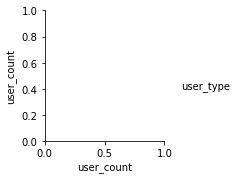

In [38]:
sns.pairplot(data=la_scaled, hue="user_type")